# Libraries import

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sympy import *
from sympy.plotting import plot
from sympy.solvers.inequalities import solve_univariate_inequality
from scipy.optimize import minimize_scalar

# Extreme values finding

## Get global local extremas using minimize_scalar

In [ ]:
# Define the function
def f(x):
    return np.exp(-x / 2) * np.cos(x)

# We will use the fact that the function tends to 0 as x approaches infinity
# and that f(0) = 1. We will search for local extrema between 0 and a sufficiently large
# value of x where the function is close to 0. The local extrema found in this range should
# give us the global extrema since the function's absolute value is decreasing.

# Find the first local minimum and maximum by numerically finding the minima of the absolute
# first derivative, which corresponds to the zeros of the first derivative.
def find_extrema(f, x_start, x_end, num_points):
    # Create a range of x values to search
    x_values = np.linspace(x_start, x_end, num_points)
    local_maxima = []
    local_minima = []

    for x0 in x_values:
        # Find local maximum
        res_max = minimize_scalar(lambda x: -f(x), bounds=(x0, x0 + (x_end - x_start) / num_points), method='bounded')
        if not local_maxima or abs(res_max.x - local_maxima[-1][0]) > 1e-2:  # Check if this maximum is a new one
            local_maxima.append((res_max.x, -res_max.fun))

        # Find local minimum
        res_min = minimize_scalar(f, bounds=(x0, x0 + (x_end - x_start) / num_points), method='bounded')
        if not local_minima or abs(res_min.x - local_minima[-1][0]) > 1e-2:  # Check if this minimum is a new one
            local_minima.append((res_min.x, res_min.fun))
    #print(local_maxima, local_minima)
    return local_maxima, local_minima

# Search for extrema in the range [0, 20], which should be enough to find the global extrema
# since the function will be very close to 0 past this range due to the exponential decay.
num_points = 100  # Number of points in the range to search for extrema
local_maxima, local_minima = find_extrema(f, 0, 20, num_points)

# Determine global maximum and minimum from the local extrema
global_maximum = max(local_maxima, key=lambda item: item[1]) if local_maxima else (0, f(0))
global_minimum = min(local_minima, key=lambda item: item[1]) if local_minima else (np.inf, 0)

global_maximum, global_minimum

((4.837936347156647e-06, 0.9999975810230493), (2.677944886744471, -0.2344426467071026))

## Get minimum value using for loop

In [ ]:
# Define the interval
x_start = 0
x_end = 20
num_points = 1000  # Increase for more precision

# Discretize the interval
x_values = np.linspace(x_start, x_end, num_points)

# Initialize max and min values
max_value = f(x_values[0])
min_value = f(x_values[0])
max_x = x_values[0]
min_x = x_values[0]

# Loop through values and find the max and min
for x in x_values:
    y = f(x)
    if y > max_value:
        max_value = y
        max_x = x
    if y < min_value:
        min_value = y
        min_x = x

# Print the results
print(f"Global maximum is at x = {max_x}, f(x) = {max_value}")
print(f"Global minimum is at x = {min_x}, f(x) = {min_value}")

Global maximum is at x = 0.0, f(x) = 1.0
Global minimum is at x = 2.6826826826826826, f(x) = -0.2344393630801716


In [ ]:
x = sp.symbols('x')
solution = sp.solve(sp.tan(x) + 1/2, x)
solution
### local exteme values x = -0.46 + n*pi neccessary condition based on my local calculation

[-0.463647609000806]

In [ ]:
solution = sp.solve(sp.tan(x) - 3/4, x)
solution
### local exteme values x = 0.64 + n*pi Sufficient conditions based on my local calculation

[0.643501108793284]

In [ ]:
# Define the inequality
diff_ff = sp.tan(x) - 3/4

# Solve the inequality
#result = sp.solve_univariate_inequality(diff_ff >= 0, x)

#print(result)

## Using sympy built in functions

In [ ]:
# Define the function
f = sp.exp(-x / 2) * sp.cos(x)

# First derivative
f_prime = sp.diff(f, x)

# Second derivative
f_double_prime = sp.diff(f_prime, x)

# Solve the first derivative for critical points
critical_points = sp.solveset(f_prime, x, domain=sp.S.Reals)

# Evaluate the second derivative at the critical points
# This step will be symbolic, we'll interpret the results for concavity test

f_prime, f_double_prime, critical_points

                  -x                           -x                                                                                                  
    -x            ---          -x              ---                                                                                                 
    ---            2           ---              2                                                                                                  
     2           e   *cos(x)    2           3*e   *cos(x)                                                                                          
(- e   *sin(x) - -----------, e   *sin(x) - -------------, {2*n*pi - atan(1/2) + pi | n in Integers} U {2*n*pi - atan(1/2) + 2*pi | n in Integers})
                      2                           4                                                                                                

# Function exploration using sympy

In [ ]:
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [ ]:
foo = exp(-x / 2) * cos(x)

In [ ]:
foo

 -x        
 ---       
  2        
e   *cos(x)

In [ ]:
foo.subs({x:0.2})

0.886800911797208

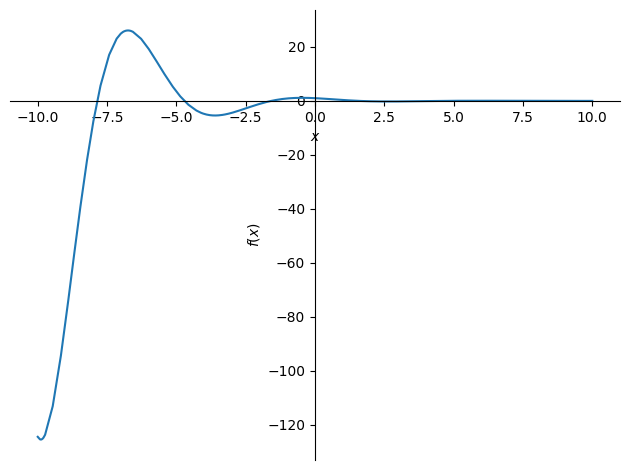

In [ ]:
plot(foo) ### I think there is a way to

In [ ]:
solve(foo)

 pi  3*pi 
[--, ----]
 2    2   

In [ ]:
#solve_univariate_inequality(f>0,x)

In [ ]:
diff_f = diff(f)
diff_f

                 -x        
   -x            ---       
   ---            2        
    2           e   *cos(x)
- e   *sin(x) - -----------
                     2     

In [ ]:
diff_ff = diff(diff_f)
diff_ff

                 -x        
 -x              ---       
 ---              2        
  2           3*e   *cos(x)
e   *sin(x) - -------------
                    4      

# Gradient Descent algorithm

## For 1D

In [ ]:
# Define the function
def f(x):
    return np.exp(-x / 2) * np.cos(x)

# Define the derivative of the function
def df(x):
    return -0.5 * np.exp(-x / 2) * np.cos(x) - np.exp(-x / 2) * np.sin(x)

# Gradient Descent function
def gradient_descent(df, initial_x, learning_rate, max_iters, tolerance):
    x = initial_x
    history = [x]  # to store all x's and f(x)'s for plotting
    for _ in range(max_iters):
        prev_x = x
        x = x - learning_rate * df(x)
        history.append(x)
        if abs(x - prev_x) < tolerance:  # convergence criteria
            break
    return x, history

# Parameters for Gradient Descent
initial_x = 2  # initial guess
learning_rate = 0.1
max_iters = 1000
tolerance = 1e-6

# Perform Gradient Descent
min_x, history = gradient_descent(df, initial_x, learning_rate, max_iters, tolerance)
min_f = f(min_x)

print(f"Minimum occurs at x = {min_x}, f(x) = {min_f}")

Minimum occurs at x = 2.677912867569764, f(x) = -0.2344426465553967


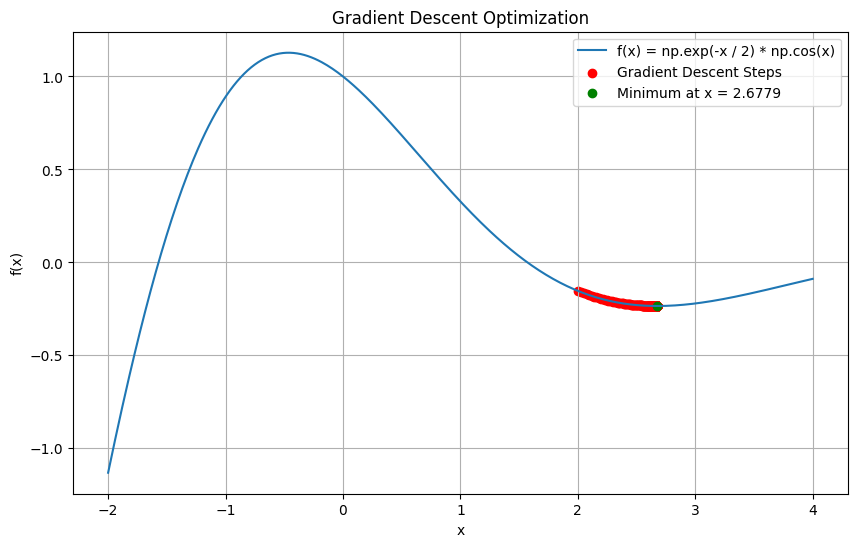

In [ ]:
# Visualization
x = np.linspace(-2, 4, 400)
y = f(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = np.exp(-x / 2) * np.cos(x)")
plt.scatter(history, f(np.array(history)), color='red', label="Gradient Descent Steps")
plt.scatter(min_x, min_f, color='green', label=f"Minimum at x = {min_x:.4f}")
plt.title("Gradient Descent Optimization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

More primitive way to understand all

In [ ]:
diff_f

                 -x        
   -x            ---       
   ---            2        
    2           e   *cos(x)
- e   *sin(x) - -----------
                     2     

In [ ]:
learning_rate = 0.01

Step 1

In [ ]:
### Running first time you need to uncomment first line and comment second one.
#point = np.array([1.0])
point = next_point

In [ ]:
grad = diff_f.subs({x:point[0]})
grad

-0.672435822829885

In [ ]:
next_point = point - step * grad
next_point

array([1.01346668731386], dtype=object)

In [ ]:
foo.subs({x: next_point[0]})
## After completing the task, please begin again from step 1 using the next point along the line.
## By manually repeating these steps, you will gradually approach the function's extreme values

0.318654456785826

## For 2D

Primitive way

In [ ]:
x = sp.symbols('x')
y = sp.symbols('y')

In [ ]:
f2d = exp(-(x**2+y**2)) * cos(x**2 + y**2)
f2d

    2    2             
 - x  - y     / 2    2\
e         *cos\x  + y /

In [ ]:
## Calculate partial diffs
f2d_x = diff(f2d,x)
f2d_y = diff(f2d,y)

In [ ]:
f2d_x

          2    2                        2    2             
       - x  - y     / 2    2\        - x  - y     / 2    2\
- 2*x*e         *sin\x  + y / - 2*x*e         *cos\x  + y /

In [ ]:
f2d_y

          2    2                        2    2             
       - x  - y     / 2    2\        - x  - y     / 2    2\
- 2*y*e         *sin\x  + y / - 2*y*e         *cos\x  + y /

In [ ]:
### Set initial value of x and y

point = np.array([0.57,0.91])
#point = next_point

In [ ]:
## Gradient calculation for specific point
grad = np.array([f2d_x.subs({x: point[0], y: point[1]}),
                 f2d_y.subs({x: point[0], y: point[1]})])
grad

array([-0.474951497354740, -0.758255899285638], dtype=object)

In [ ]:
step = 0.1

In [ ]:
next_point = point - step * grad
next_point

array([0.574749514973547, 0.917582558992856], dtype=object)

In [ ]:
f2d.subs({x: next_point[0], y: next_point[1]})

0.120158042339488

In [ ]:
def f2d(X, Y):
    return np.exp(-(X**2 + Y**2)) * np.cos(X**2 + Y**2)

# Define the range for x1 and x2
x1_start, x1_end = -10, 10
x2_start, x2_end = -10, 10
num_points = 100  # Number of points in each dimension

# Generate points
x1_values = np.linspace(x1_start, x1_end, num_points)
x2_values = np.linspace(x2_start, x2_end, num_points)

# Initialize variables to store the min/max values and their corresponding x1, x2 values
min_value = f2d(x1_values[0], x2_values[0])
max_value = min_value
min_x1, min_x2 = x1_values[0], x2_values[0]
max_x1, max_x2 = min_x1, min_x2

# Nested loop to find the min and max
for x1 in x1_values:
    for x2 in x2_values:
        y = f2d(x1, x2)
        if y < min_value:
            min_value = y
            min_x1, min_x2 = x1, x2
        if y > max_value:
            max_value = y
            max_x1, max_x2 = x1, x2

print(f"Global minimum is at x1 = {min_x1}, x2 = {min_x2}, f(x1, x2) = {min_value}")
print(f"Global maximum (within the given range) is at x1 = {max_x1}, x2 = {max_x2}, f(x1, x2) = {max_value}")

Global minimum is at x1 = -1.5151515151515156, x2 = -0.30303030303030276, f(x1, x2) = -0.06695537141120436
Global maximum (within the given range) is at x1 = -0.10101010101010033, x2 = -0.10101010101010033, f(x1, x2) = 0.9795967226259388


Graadient descent algorithm

In [ ]:
# Function to compute the gradient of f
def gradient(X, Y):
    df_dX = (-2*X*np.exp(-(X**2 + Y**2)) * np.cos(X**2 + Y**2)) + (np.exp(-(X**2 + Y**2)) * -np.sin(X**2 + Y**2) * 2*X)
    df_dY = (-2*Y*np.exp(-(X**2 + Y**2)) * np.cos(X**2 + Y**2)) + (np.exp(-(X**2 + Y**2)) * -np.sin(X**2 + Y**2) * 2*Y)
    return np.array([df_dX, df_dY])

# Gradient descent algorithm
def gradient_descent(X_start, Y_start, learning_rate, iterations):
    X, Y = X_start, Y_start
    history = [] # To store the history of X and Y

    for i in range(iterations):
        grad = gradient(X, Y)
        X, Y = X - learning_rate * grad[0], Y - learning_rate * grad[1]
        history.append((X, Y))

    return X, Y, history

# Example usage
X_start, Y_start = 0.5, -0.5 # Initial values
learning_rate = 0.01
iterations = 1000000

X_min, Y_min, history = gradient_descent(X_start, Y_start, learning_rate, iterations)
print(f"Minimum at X = {X_min}, Y = {Y_min}")


Minimum at X = 1.0854018818373927, Y = -1.0854018818373927


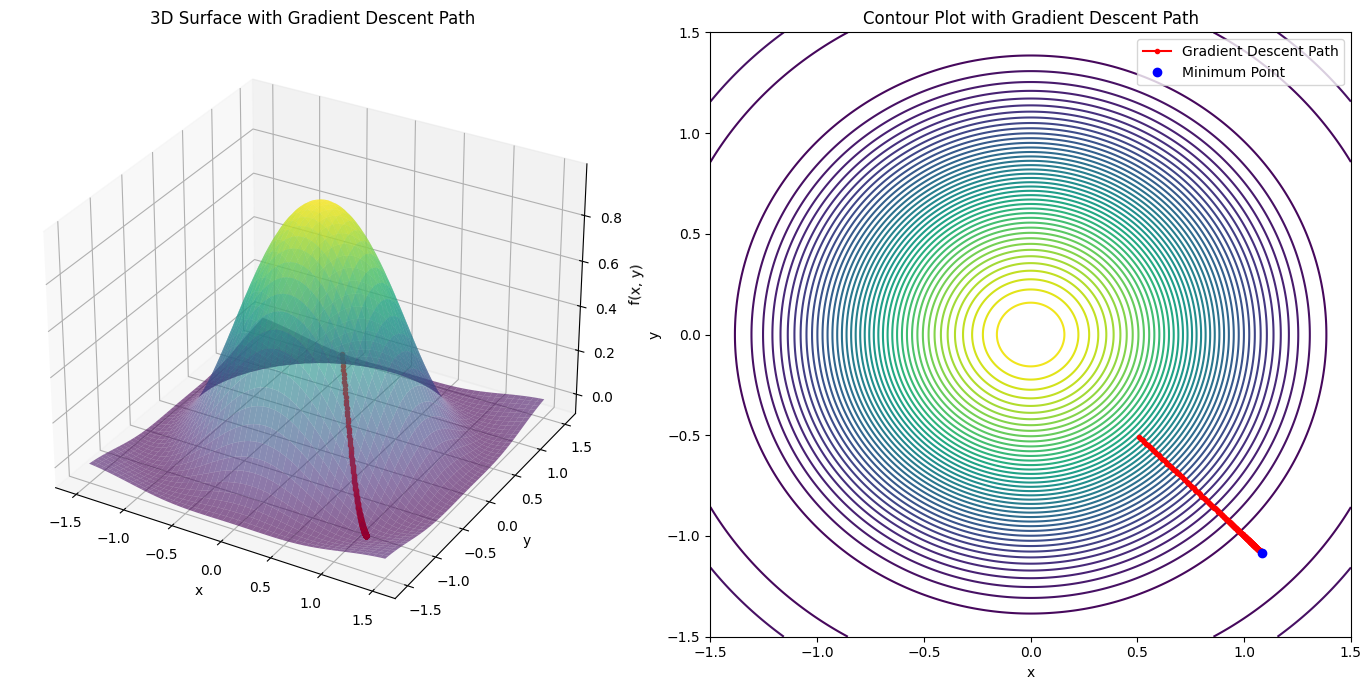

In [ ]:
def f2d_vectorized(x, y):
    return np.exp(-(x**2 + y**2)) * np.cos(x**2 + y**2)

# Convert history to a NumPy array for easier manipulation
history_array = np.array(history)
# Reshape the history_array for plotting
reshaped_history_array = history_array.reshape(-1, 2)

# Re-plot using the corrected array

# Generate a grid for visualization
x_range = np.linspace(-1.5, 1.5, 400)
y_range = np.linspace(-1.5, 1.5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = f2d_vectorized(X, Y)

# Plot the surface
fig = plt.figure(figsize=(14, 7))

# 3D surface plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.plot3D(reshaped_history_array[:,0], reshaped_history_array[:,1], f2d_vectorized(reshaped_history_array[:,0], reshaped_history_array[:,1]), 'r.-')
ax.set_title('3D Surface with Gradient Descent Path')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Contour plot with gradient descent path
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
ax2.plot(reshaped_history_array[:,0], reshaped_history_array[:,1], 'r.-', label='Gradient Descent Path')
ax2.plot(X_min, Y_min, 'bo', label='Minimum Point')  # Mark the minimum point
ax2.set_title('Contour Plot with Gradient Descent Path')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()

plt.tight_layout()
plt.show()